In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_rfm= pd.read_excel("Online Retail.xlsx")

In [3]:
df_rfm .head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#distribution by country
country_cust_data= df_rfm[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending= False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [6]:
df1=df_rfm.query("Country=='United Kingdom'").reset_index(drop=True)

In [8]:
df1.shape

(495478, 8)

In [9]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [10]:
df1=df1[pd.notnull(df1['CustomerID'])]

In [11]:
df1['Quantity'].min()

-80995

In [12]:
df1=df1[(df1['Quantity']>0)]

In [13]:
df1['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
495473   2011-12-09 12:31:00
495474   2011-12-09 12:49:00
495475   2011-12-09 12:49:00
495476   2011-12-09 12:49:00
495477   2011-12-09 12:49:00
Name: InvoiceDate, Length: 354345, dtype: datetime64[ns]

In [14]:
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])

In [15]:
df1["TotalAmount"]=df1['Quantity']*df1['UnitPrice']

In [16]:
df1.shape

(354345, 9)

In [17]:
import datetime as dt

In [18]:
latest_date = dt.datetime(2011,12,10)

In [23]:
rfm_score=df1.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,'InvoiceNo':lambda x:len(x),'TotalAmount':lambda x:x.sum()})

In [24]:
rfm_score["InvoiceDate"]=rfm_score["InvoiceDate"].astype(int)

In [29]:
rfm_score.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalAmount':'Monetary'},inplace=True)

In [30]:
rfm_score.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [31]:
rfm_score['Recency'].describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [32]:
import seaborn as sns

C:\Users\sivachandru.annad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

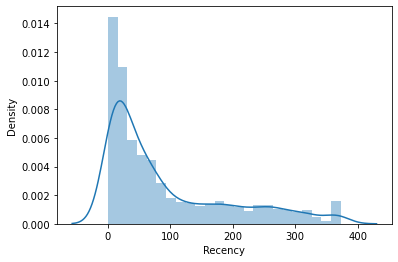

In [34]:
sns.distplot(rfm_score['Recency'])

In [35]:
rfm_score['Frequency'].describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

C:\Users\sivachandru.annad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

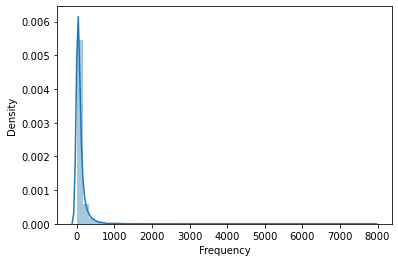

In [36]:
sns.distplot(rfm_score['Frequency'])

C:\Users\sivachandru.annad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

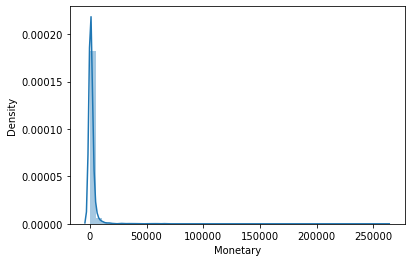

In [37]:
sns.distplot(rfm_score['Monetary'])

In [38]:
rfm_score['Monetary'].describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

In [39]:
quantiles=rfm_score.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()

In [40]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [46]:
def Rscoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
def FMscoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
    

In [48]:
rfm_score['R']=rfm_score['Recency'].apply(Rscoring,args=('Recency',quantiles))
rfm_score['F']=rfm_score['Frequency'].apply(FMscoring,args=('Frequency',quantiles))
rfm_score['M']=rfm_score['Monetary'].apply(FMscoring,args=('Monetary',quantiles))


,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2
...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4
18281.0,180,7,80.82,4,4,4
18282.0,7,12,178.05,1,4,4


In [50]:
rfm_score.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [51]:
rfm_score['rfmgroup']=rfm_score.R.map(str)+rfm_score.F.map(str)+rfm_score.M.map(str)
rfm_score['rfmscore']=rfm_score[['R','F','M']].sum(axis=1)
rfm_score.head()

,Recency,Frequency,Monetary,R,F,M,rfmgroup,rfmscore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [53]:
Loyalty_level=['Platinum','Gold','sliver','Bronze']
Score_cuts= pd.qcut(rfm_score.rfmscore,q=4,labels=Loyalty_level)
rfm_score['Loyalty_levels']= Score_cuts.values
rfm_score.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,rfmgroup,rfmscore,Loyalty_levels
0,12346.0,325,1,77183.60,4,4,1,441,9,sliver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [55]:
Score_cuts

CustomerID
12346.0      sliver
12747.0    Platinum
12748.0    Platinum
12749.0    Platinum
12820.0    Platinum
             ...   
18280.0      Bronze
18281.0      Bronze
18282.0      sliver
18283.0    Platinum
18287.0    Platinum
Name: rfmscore, Length: 3921, dtype: category
Categories (4, object): ['Platinum' < 'Gold' < 'sliver' < 'Bronze']

In [57]:
rfm_score[rfm_score['rfmgroup']=='111'].sort_values('Monetary',ascending= False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,rfmgroup,rfmscore,Loyalty_levels
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum
